# Exploratory Data Analysis

Importing Packages

In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import plotly.graph_objects as go

Reading the data

In [2]:
df = pl.read_csv(r"data/main/NVDA.csv", try_parse_dates=True).sort(by="Date")
df.head()

Date,Open,High,Low,Close,Adj Close,Volume
date,f64,f64,f64,f64,f64,i64
2000-01-03,0.984375,0.992188,0.919271,0.97526,0.894608,30091200
2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2000-01-05,0.921875,0.9375,0.904948,0.917969,0.842055,18835200
2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
2000-01-07,0.854167,0.88151,0.841146,0.872396,0.800251,7118400


Initial Summary Statistics

In [3]:
summary_stats = df.describe()
summary_stats

statistic,Date,Open,High,Low,Close,Adj Close,Volume
str,str,f64,f64,f64,f64,f64,f64
"""count""","""6116""",6116.0,6116.0,6116.0,6116.0,6116.0,6116.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2012-02-28 11:27:16.363000""",53.052266,54.017201,52.0317,53.064741,52.794253,6.2219e7
"""std""",null,121.267334,123.423982,118.835114,121.183234,121.214864,4.3167e7
"""min""","""2000-01-03""",0.608333,0.656667,0.6,0.614167,0.563377,4.5644e6
"""25%""","""2006-02-02""",2.96,3.0275,2.875,2.950521,2.708334,3.61608e7
"""50%""","""2012-02-29""",4.685,4.7475,4.61,4.6825,4.389289,5.20639e7
"""75%""","""2018-03-27""",42.099998,42.645,41.4925,42.099998,41.730057,7.46548e7
"""max""","""2024-04-24""",958.51001,974.0,935.099976,950.02002,950.02002,9.230856e8


> NVIDIA’s stock has skyrocketed from around $0.60 in 2000 to highs of $950, showing huge growth. The average price is about $53, but the high standard deviation (over 120) highlights its volatility. Trading volume varies a lot too, averaging 62 million shares but ranging from 4.5 million to 923 million, likely caused by chip releases.

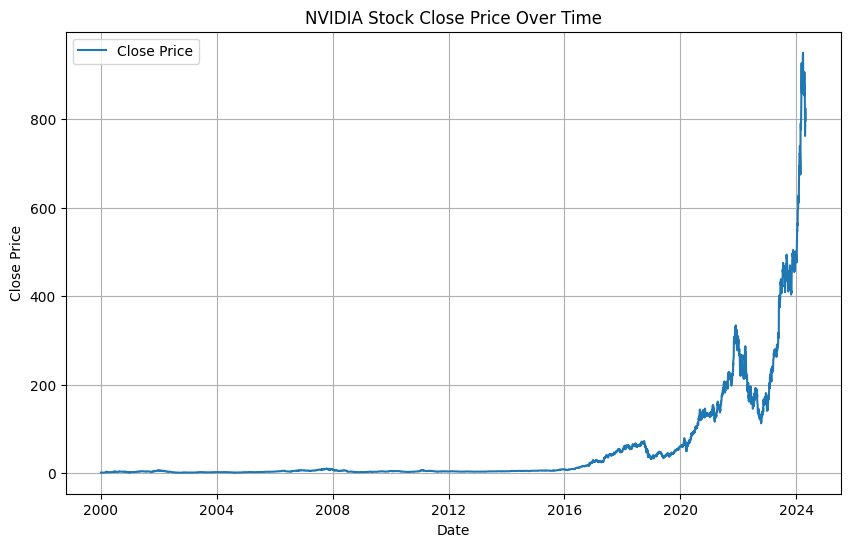

In [4]:
# Line chart of 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NVIDIA Stock Close Price Over Time')
plt.grid(True)
plt.legend()
plt.show()

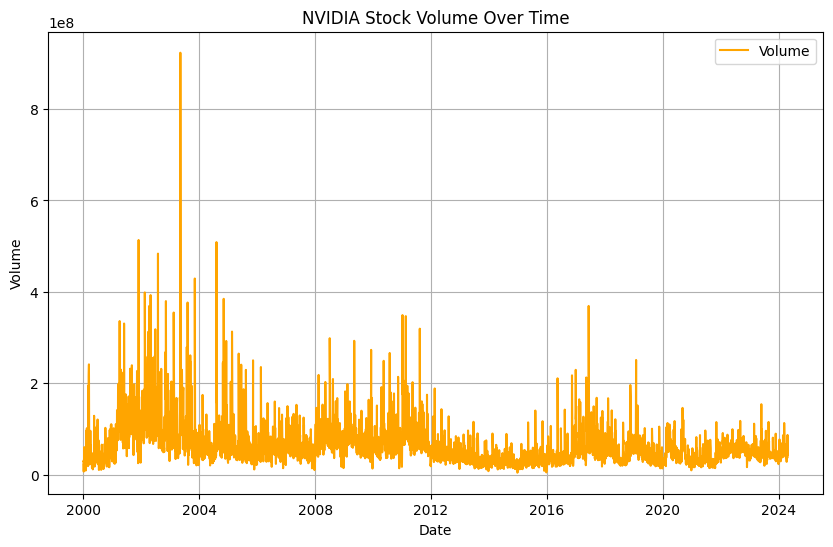

In [5]:
# Line chart of 'Volume' over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('NVIDIA Stock Volume Over Time')
plt.grid(True)
plt.legend()
plt.show()

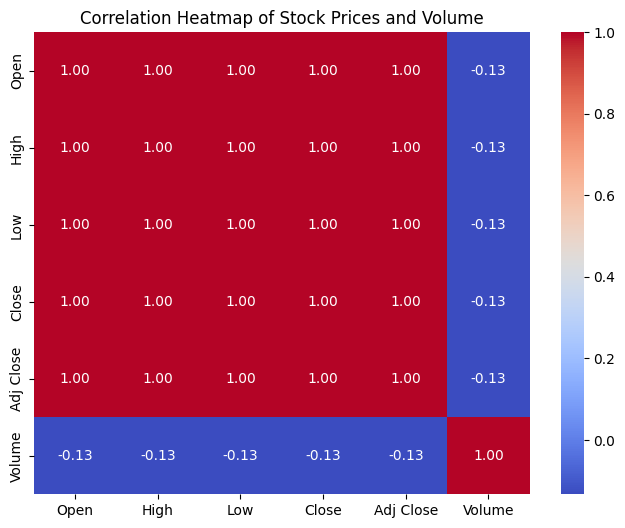

In [6]:
# Correlation Matrix
corr_matrix = df.select(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']).to_pandas().corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Stock Prices and Volume')
plt.show()

> The correlation plot shows perfect correlations between all the price points, meaning they are moving too similarly to give us much insight. This likely means we are missing external factors that impact the stock. To break this up and get a clearer picture, we could bring in sentiment data from news or social media. Adding sentiment would help capture how people feel about NVIDIA and how that impacts price movements and volume, which should make the correlations less extreme and give us more useful information.

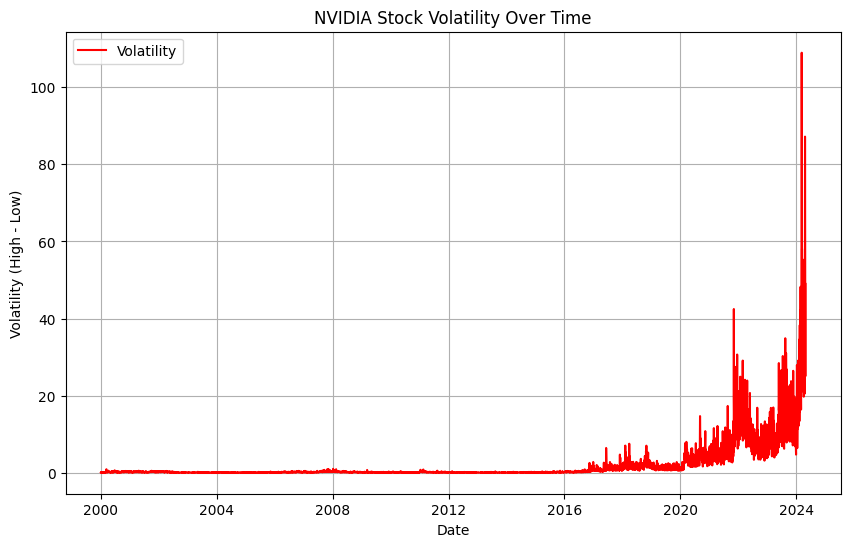

In [7]:
# Volatility calculation (High - Low)
df = df.with_columns((pl.col('High') - pl.col('Low')).alias('Volatility'))

# Line chart of Volatility over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility (High - Low)')
plt.title('NVIDIA Stock Volatility Over Time')
plt.grid(True)
plt.legend()
plt.show()

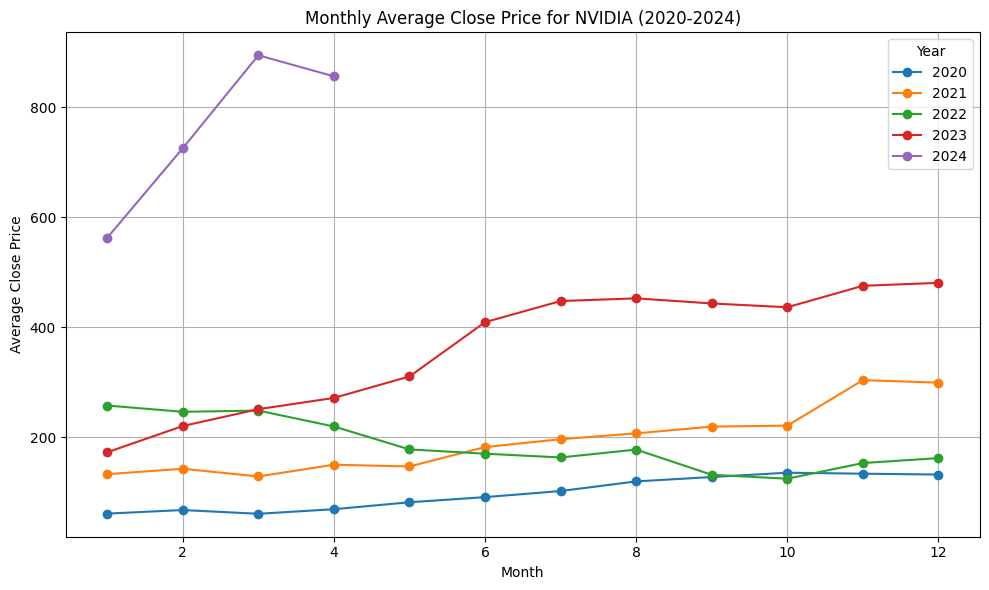

In [8]:
# Extract 'Year' and 'Month' columns
df = df.with_columns([
    pl.col('Date').dt.year().alias('Year'),
    pl.col('Date').dt.month().alias('Month')
])

# Filter the data to only include rows from 2020 to 2024
df_filtered = df.filter((pl.col('Year') >= 2020) & (pl.col('Year') <= 2024))

# Group by 'Year' and 'Month' to calculate monthly averages of Close price
monthly_avg = df_filtered.group_by(['Year', 'Month']).agg([
    pl.col('Close').mean().alias('Avg_Close')
])

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Plot each year's data as its own line, with months on the x-axis
for year in [2020, 2021, 2022, 2023, 2024]:
    year_data = monthly_avg.filter(pl.col('Year') == year).sort(by=["Year", "Month"])
    plt.plot(year_data['Month'], year_data['Avg_Close'], marker='o', label=f'{year}')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.title('Monthly Average Close Price for NVIDIA (2020-2024)')
plt.grid(True)
plt.legend(title="Year")
plt.tight_layout()

# Show the plot
plt.show()

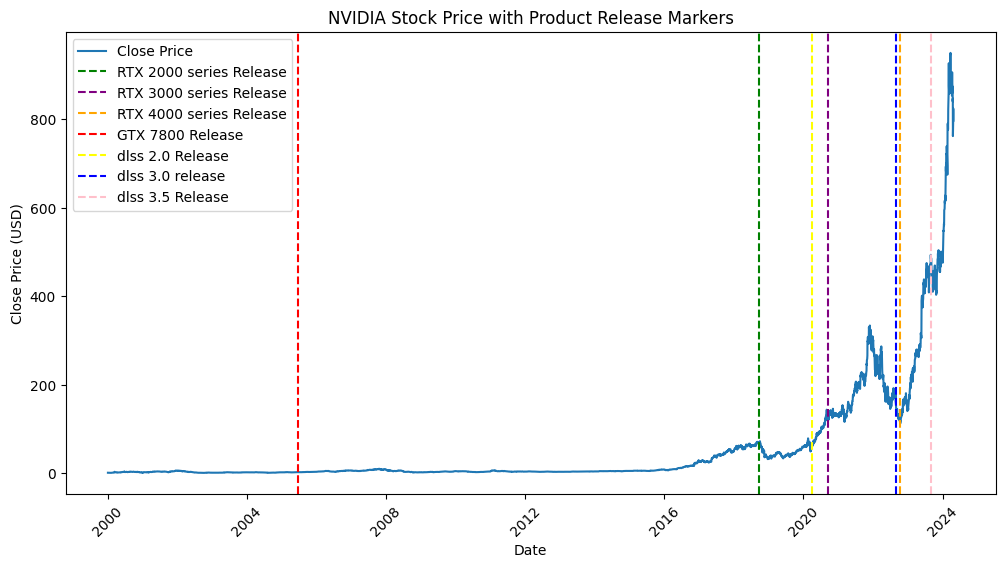

In [9]:
# Example product release dates for RTX and GTX 
rtx_release2 = pd.to_datetime('2018-09-20')  # RTX 20 series
rtx_release3 = pd.to_datetime('2020-09-17')  # RTX 30 series
rtx_release4 = pd.to_datetime('2022-10-12')  # RTX 40 series
gtx_release = pd.to_datetime('2005-06-22')  #GTX 7800
dlss_release2 = pd.to_datetime('2020-04-01')  #DLSS 2.0
dlss_release3 = pd.to_datetime('2022-9-01')  #DLSS 3.0
dlss_release35 = pd.to_datetime('2023-09-01')  #DLSS 3.5

# Plot closing price with event markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df, label='Close Price')
plt.axvline(x=rtx_release2, color='green', linestyle='--', label='RTX 2000 series Release')
plt.axvline(x=rtx_release3, color='purple', linestyle='--', label='RTX 3000 series Release')
plt.axvline(x=rtx_release4, color='orange', linestyle='--', label='RTX 4000 series Release')
plt.axvline(x=gtx_release, color='red', linestyle='--', label='GTX 7800 Release')
plt.axvline(x=dlss_release2, color='yellow', linestyle='--', label='dlss 2.0 Release')
plt.axvline(x=dlss_release3, color='blue', linestyle='--', label='dlss 3.0 release')
plt.axvline(x=dlss_release35, color='pink', linestyle='--', label='dlss 3.5 Release')

plt.title('NVIDIA Stock Price with Product Release Markers')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [10]:
# Define important release dates using Polars
# Define important release dates using Python's datetime
release_dates = {
    'RTX 2000 Series': date(2018, 9, 20),
    'RTX 3000 Series': date(2020, 9, 17),
    'RTX 4000 Series': date(2022, 10, 12),
    'GTX 7800 Release': date(2005, 6, 22),
    'DLSS 2.0 Release': date(2020, 4, 1),
    'DLSS 3.0 Release': date(2022, 9, 1),
    'DLSS 3.5 Release': date(2023, 9, 1)
}

# Sets the window size for before and after comparison
window = 90  # 90 days before and after

# Create a list to store the results
analysis_data = []

# Iterate over each release date
for release, date in release_dates.items():
    # Filter data for the 90 days before the release
    df_before = df.filter((pl.col("Date") >= date - pl.duration(days=window)) & (pl.col("Date") < date))

    # Filter data for the 90 days after the release
    df_after = df.filter((pl.col("Date") > date) & (pl.col("Date") <= date + pl.duration(days=window)))

    # Calculate average close price before and after the release
    avg_close_before = df_before.select(pl.col('Close').mean())[0, 0] if not df_before.is_empty() else None
    avg_close_after = df_after.select(pl.col('Close').mean())[0, 0] if not df_after.is_empty() else None

    # Calculate percentage change
    if avg_close_before and avg_close_after:
        pct_change = ((avg_close_after - avg_close_before) / avg_close_before) * 100
    else:
        pct_change = None

    # Append results to the analysis data list
    analysis_data.append({
        'Release': release,
        'Date': date,
        'Avg Close Before': avg_close_before,
        'Avg Close After': avg_close_after,
        'Percentage Change (%)': pct_change
    })

# Convert the analysis data to a Polars DataFrame
release_analysis = pl.DataFrame(analysis_data)

# Display the analysis
release_analysis

Release,Date,Avg Close Before,Avg Close After,Percentage Change (%)
str,date,f64,f64,f64
"""RTX 2000 Series""",2018-09-20,64.329718,51.391935,-20.111673
"""RTX 3000 Series""",2020-09-17,111.703871,133.340874,19.369967
"""RTX 4000 Series""",2022-10-12,155.149523,149.965082,-3.341577
"""GTX 7800 Release""",2005-06-22,2.055847,2.405551,17.010235
"""DLSS 2.0 Release""",2020-04-01,63.092541,81.220847,28.732884
"""DLSS 3.0 Release""",2022-09-01,170.090645,136.480161,-19.760337
"""DLSS 3.5 Release""",2023-09-01,438.121774,450.985808,2.936178


> NVIDIA’s stock performance has shown varied reactions to major product releases between 2005 and 2023. The GTX 7800 release in 2005 saw a positive 17% increase, reflecting early confidence in NVIDIA’s GPUs. The RTX 2000 series release in 2018 led to a 20% decline, while the RTX 3000 series in 2020 had the opposite effect, boosting the stock by 19%. The RTX 4000 series in 2022 saw a 3% decline, indicating a more neutral market reception. NVIDIA’s DLSS releases also played a significant role, with DLSS 2.0 in 2020 resulting in a 28% stock increase, suggesting strong market approval, while DLSS 3.0 in 2022 led to a nearly 20% decline. However, DLSS 3.5 in 2023 saw a 3% increase, signaling a more stable but positive reaction. Overall, these fluctuations suggest that while some releases were met with enthusiasm, others faced challenges, likely due to broader market conditions or unmet expectations.

In [14]:
# Filter data for the range 2020-2024
df_filtered = df.filter((pl.col('Date') >= pl.date(year=2020, month=1, day=1)) & (pl.col('Date') <= pl.date(year=2024, month=12, day=31)))

# Convert filtered data to Pandas for Plotly compatibility
df_pandas = df_filtered.to_pandas()

# Sort the data by date
df_pandas = df_pandas.sort_values('Date')

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df_pandas['Date'],
                                     open=df_pandas['Open'],
                                     high=df_pandas['High'],
                                     low=df_pandas['Low'],
                                     close=df_pandas['Close'])])

fig.update_layout(title="NVIDIA Stock Price Candlestick Chart (2022-2024)",
                  xaxis_title="Date",
                  yaxis_title="Price (USD)")

# Display the chart
fig.show()

This candlestick chart visualizes NVIDIA's stock price movements between 2022 and 2024, showing daily fluctuations in the form of candlesticks, where each represents a day's open, high, low, and close prices. The chart gives a clear view of how the stock performed during this period, highlighting periods of volatility, upward trends, and market corrections.